In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("mobile.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# duplicate column with pandas assigment
# we are going to use selectKbest, it is used for Univariate analysis

from sklearn.feature_selection import SelectKBest, chi2

# we use chi2 when we have one categorical and one continoues variable   

In [6]:
# we are diving data into x and y 

x = data.iloc[:,:-1]
y = data["price_range"]

x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [7]:
data.shape

(2000, 21)

In [8]:
# lets create instance of the SelectKBest class

selector = SelectKBest(score_func = chi2, k = 20)
order_feature = selector.fit(x,y)

order_feature_score = order_feature.scores_  # this provide 
print(order_feature_score)

[1.41298666e+04 7.23232323e-01 6.48365906e-01 6.31010795e-01
 1.01351665e+01 1.52157239e+00 8.98391244e+01 7.45819631e-01
 9.59728626e+01 9.09755558e+00 9.18605355e+00 1.73635695e+04
 9.81058675e+03 9.31267519e+05 9.61487832e+00 1.64803191e+01
 1.32364000e+01 3.27642810e-01 1.92842942e+00 4.22090730e-01]


In [12]:
cols = pd.DataFrame(x.columns, columns =["feature_name"])
score = pd.DataFrame(order_feature_score, columns =["score"])
feature_score = pd.concat([cols,score],axis = 1)
feature_score.sort_values(by = "score", ascending = False)

,feature_name,score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# now we will do the feature importance with extratreeclassifier

In [16]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# creating instance of extratreeclassifier

extra_tree = ExtraTreesClassifier()

feature = extra_tree.fit(x,y)


In [17]:
feature_score = feature.feature_importances_
print(feature_score)

[0.06266509 0.01930127 0.03163579 0.0184417  0.03138527 0.01739547
 0.03402417 0.03165502 0.03530603 0.03173335 0.03152718 0.04508969
 0.04848023 0.41050422 0.03342375 0.03268429 0.03323829 0.01409453
 0.01808778 0.01932689]


In [18]:
feature = pd.Series(feature_score,index = x.columns)
feature

battery_power    0.062665
blue             0.019301
clock_speed      0.031636
dual_sim         0.018442
fc               0.031385
four_g           0.017395
int_memory       0.034024
m_dep            0.031655
mobile_wt        0.035306
n_cores          0.031733
pc               0.031527
px_height        0.045090
px_width         0.048480
ram              0.410504
sc_h             0.033424
sc_w             0.032684
talk_time        0.033238
three_g          0.014095
touch_screen     0.018088
wifi             0.019327
dtype: float64

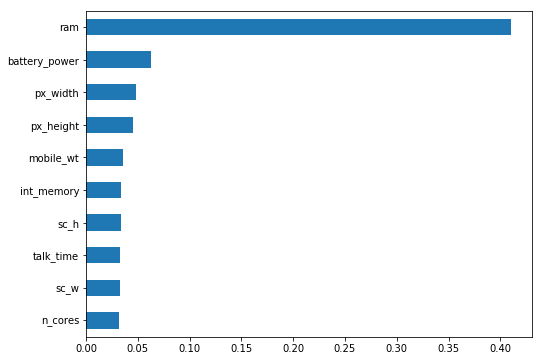

In [23]:
plt.figure(figsize= (8,6))
feature.nlargest(10).sort_values(ascending = True).plot(kind = "barh")